# Gaussian NB
Nive Bayes with numerical attributes.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.DataFrame([[0.25, 0.25, "N"], [0.50, 0.50, "N"],
              [0.75, 0.25, "N"], [0.75, 0.75, "N"], 
              [1.25, 0.25, "N"], [1.75, 0.25, "N"],
              [2.00, 0.50, "N"], [2.25, 0.75, "N"],
              [2.25, 0.25, "N"], [1.00, 0.50, "P"],
              [1.25, 0.75, "P"], [1.50, 0.50, "P"],
              [1.75, 0.75, "P"], [2.25, 0.50, "P"],
              [2.50, 0.75, "P"],
             ], columns=["A", "B", "class"])

In [22]:
def get_color(cl):
    if cl == "N":
        return "blue"
    else:
        return "red"

df["color"] = df["class"].apply(lambda x: get_color(x))

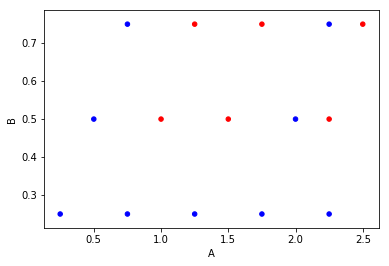

In [25]:
df.plot(kind="scatter", x="A", y="B", c=df.color)
plt.show()

In [37]:
a_var_p = df[df["class"] == "P"].A.var()
a_mean_p = df[df["class"] == "P"].A.mean()

b_var_p = df[df["class"] == "P"].B.var()
b_mean_p = df[df["class"] == "P"].B.mean()

a_var_n = df[df["class"] == "N"].A.var()
a_mean_n = df[df["class"] == "N"].A.mean()

b_var_n = df[df["class"] == "N"].B.var()
b_mean_n = df[df["class"] == "N"].B.mean()

In [48]:
import math

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [57]:
def predict(x1, x2):
    p_prob = normpdf(x1, a_mean_p, np.sqrt(a_var_p)) * normpdf(x2, b_mean_p, np.sqrt(b_var_p))
    n_prob = normpdf(x1, a_mean_n, np.sqrt(a_var_n)) * normpdf(x2, b_mean_n, np.sqrt(b_var_n))
    if p_prob > n_prob:
        return "P"
    else:
        return "N"

In [59]:
df["pred"] = df.apply(lambda x: predict(x.A, x.B), axis=1)

In [64]:
print("accuracy:", sum(df["class"] == df.pred) / len(df))

accuracy: 0.7333333333333333


In [75]:
df

,A,B,class,color,pred
0,0.25,0.25,N,blue,N
1,0.50,0.50,N,blue,N
2,0.75,0.25,N,blue,N
3,0.75,0.75,N,blue,P
4,1.25,0.25,N,blue,N
5,1.75,0.25,N,blue,N
6,2.00,0.50,N,blue,P
7,2.25,0.75,N,blue,P
8,2.25,0.25,N,blue,N
9,1.00,0.50,P,red,N
